In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
# reading in the standardized features and targets
df = pd.read_csv('engineered_df_with_category_interactions.csv')

X = df.drop('cardio',axis=1)
columns = len(X.columns)

y = df.cardio
y.head(3)

0    0
1    1
2    1
Name: cardio, dtype: int64

In [3]:
#train test spilt 80% train, stratified over the target, with random_state equal to zero
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=0, stratify=y)

## Setting Up PCA to Account for 95% Variance

In [4]:
# fitting PCA to my data to obtain new features
pca = PCA(n_components=columns)
pca.fit(X_train)

PCA(n_components=217)

In [5]:
#generating column names
cols=['PC-'+str(i+1) for i in range(columns)]
cols

['PC-1',
 'PC-2',
 'PC-3',
 'PC-4',
 'PC-5',
 'PC-6',
 'PC-7',
 'PC-8',
 'PC-9',
 'PC-10',
 'PC-11',
 'PC-12',
 'PC-13',
 'PC-14',
 'PC-15',
 'PC-16',
 'PC-17',
 'PC-18',
 'PC-19',
 'PC-20',
 'PC-21',
 'PC-22',
 'PC-23',
 'PC-24',
 'PC-25',
 'PC-26',
 'PC-27',
 'PC-28',
 'PC-29',
 'PC-30',
 'PC-31',
 'PC-32',
 'PC-33',
 'PC-34',
 'PC-35',
 'PC-36',
 'PC-37',
 'PC-38',
 'PC-39',
 'PC-40',
 'PC-41',
 'PC-42',
 'PC-43',
 'PC-44',
 'PC-45',
 'PC-46',
 'PC-47',
 'PC-48',
 'PC-49',
 'PC-50',
 'PC-51',
 'PC-52',
 'PC-53',
 'PC-54',
 'PC-55',
 'PC-56',
 'PC-57',
 'PC-58',
 'PC-59',
 'PC-60',
 'PC-61',
 'PC-62',
 'PC-63',
 'PC-64',
 'PC-65',
 'PC-66',
 'PC-67',
 'PC-68',
 'PC-69',
 'PC-70',
 'PC-71',
 'PC-72',
 'PC-73',
 'PC-74',
 'PC-75',
 'PC-76',
 'PC-77',
 'PC-78',
 'PC-79',
 'PC-80',
 'PC-81',
 'PC-82',
 'PC-83',
 'PC-84',
 'PC-85',
 'PC-86',
 'PC-87',
 'PC-88',
 'PC-89',
 'PC-90',
 'PC-91',
 'PC-92',
 'PC-93',
 'PC-94',
 'PC-95',
 'PC-96',
 'PC-97',
 'PC-98',
 'PC-99',
 'PC-100',
 'PC-101

In [6]:
# viewing the variances each of the PCs account for
PVE = pca.explained_variance_ratio_
PVE = pd.Series(PVE,index=cols)
PVE

PC-1      2.180436e-01
PC-2      1.065318e-01
PC-3      9.277861e-02
PC-4      8.502828e-02
PC-5      6.249870e-02
              ...     
PC-213    1.429220e-33
PC-214    1.327656e-33
PC-215    6.088904e-34
PC-216    5.210971e-34
PC-217    1.545616e-34
Length: 217, dtype: float64

In [7]:
# loop to determine how many PCs are needed to account for 90% of the variance in the data
total = 0
for k  in range(columns):
    total = total + PVE[k]
    if total > 0.95:
        break

print('total variance accounted for:', total)
print('go through PC-',k + 1)

total variance accounted for: 0.9503383798722145
go through PC- 37


<Axes: title={'center': 'PVE'}>

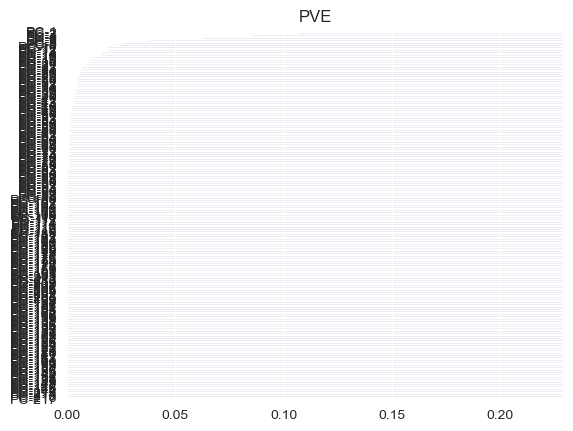

In [8]:
# visualized variance amounts
PVE.sort_values().plot.barh(color='cyan', title='PVE')

In [9]:
# view of the loadings associated with each feature for each PC
loadings = pca.components_
loadings = pd.DataFrame(loadings,index = cols, columns = X.columns)
loadings

,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,smoke_0 active_0,smoke_0 active_1,smoke_1 alco_0,smoke_1 alco_1,smoke_1 active_0,smoke_1 active_1,alco_0 active_0,alco_0 active_1,alco_1 active_0,alco_1 active_1
PC-1,0.070722,0.005843,0.134721,0.210859,0.209004,0.135145,0.225454,-0.007978,0.007978,-0.023204,...,0.000069,-0.001613,0.000939,0.000605,0.000361,0.001184,0.000061,-0.002067,0.000369,0.001637
PC-2,0.026484,-0.040605,-0.274617,0.102399,0.109326,-0.259393,0.113962,0.005691,-0.005691,0.004038,...,-0.001414,0.002982,-0.001329,-0.000239,-0.000623,-0.000946,-0.001535,0.003539,-0.000501,-0.001503
PC-3,0.024915,-0.307700,-0.060505,-0.010041,-0.029435,0.110112,-0.021874,0.098601,-0.098601,-0.014598,...,0.000038,0.019617,-0.013586,-0.006069,-0.002277,-0.017378,-0.001440,0.008624,-0.000799,-0.006385
PC-4,-0.174580,0.175233,0.048407,0.013230,0.009823,-0.050735,0.012264,-0.055715,0.055715,0.003777,...,-0.001941,-0.011733,0.009503,0.004171,0.001790,0.011884,-0.000860,-0.005051,0.000710,0.005202
PC-5,0.368209,0.085965,0.017852,-0.018039,-0.051071,-0.033374,-0.038262,-0.036058,0.036058,-0.016712,...,0.002598,-0.007445,0.003885,0.000962,0.001072,0.003776,0.003168,-0.004736,0.000502,0.001066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC-213,-0.852146,-0.002161,0.000055,0.014210,-0.005551,-0.001462,-0.006786,0.002926,0.002860,-0.000870,...,-0.001180,-0.000336,0.001876,-0.001124,-0.000342,0.000502,0.000326,0.001215,-0.001491,-0.000602
PC-214,-0.000000,-0.196977,-0.029765,0.335174,0.004770,0.260160,-0.120266,-0.043497,0.009629,-0.078221,...,0.033575,-0.024068,-0.022498,-0.011849,-0.005038,-0.062682,-0.020692,0.012060,-0.007852,0.024900
PC-215,0.000000,0.197819,0.116778,0.007083,0.053507,-0.039290,0.019417,0.007831,0.029550,0.021921,...,-0.054747,-0.121023,0.021315,0.007784,-0.019382,-0.085658,-0.028703,-0.038539,0.020057,0.010221
PC-216,0.000000,0.109701,-0.012370,-0.121024,-0.069866,0.062330,-0.006436,0.017293,0.042167,0.134477,...,-0.026208,-0.080226,-0.011926,0.071195,-0.028385,-0.082403,-0.008671,0.139247,-0.077184,0.070734


In [10]:
#looking at the loadings specifially for PC-1 and sorting them, this PC holds 21.8% of the variance in the entire set
load_1 = loadings.T['PC-1']
load_1.sort_values(ascending=False)

MAP                     0.225454
MAP alco_0              0.215193
ap_hi                   0.210859
MAP smoke_0             0.209714
ap_lo                   0.209004
                          ...   
cholesterol_1 gluc_1   -0.024827
height weight          -0.025226
height ap_lo           -0.039275
height ap_hi           -0.040627
height MAP             -0.042870
Name: PC-1, Length: 217, dtype: float64

In [11]:
# obtaining new numbers to be used in KNN for each PC and data record
# note: this only goes through 37 PCs as that accounts for 95%
Z = pca.transform(X_train)
Z = pd.DataFrame(Z,columns=cols)
Z = Z.iloc[:,0:k+1]
Z

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-28,PC-29,PC-30,PC-31,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37
0,14.058081,6.976677,3.026544,-0.575344,-6.134570,-3.965035,-3.309194,6.358307,2.140739,0.729260,...,-0.306280,-0.329091,-0.259574,0.362841,0.143507,-0.204942,-0.741172,0.048161,0.127279,-0.015057
1,-1.868322,2.456596,0.804599,-2.219131,2.255148,0.135702,-1.203027,0.496104,-0.264898,0.894103,...,-0.311119,0.371241,-0.000503,-0.288685,0.207350,-0.003228,-0.413975,0.814965,-0.531576,-0.164476
2,-0.748315,1.385945,-3.699184,-0.312275,3.718590,-1.319720,-0.115753,0.207351,0.993339,-0.557034,...,-0.510421,0.583855,0.136946,-0.193981,0.074803,-0.150852,-0.020519,-0.703566,-0.269960,0.066009
3,-0.454816,-0.432880,-0.587242,-0.943847,0.671856,-0.161223,-0.194271,-0.116259,-2.162123,-0.736078,...,0.297079,-0.592561,-1.210629,0.952645,0.167569,-0.335110,1.154370,0.262460,-0.153803,-0.373830
4,-1.280915,1.618399,-0.359040,-2.298217,3.455027,-0.489630,-1.052892,0.557390,0.477283,1.644433,...,-0.203770,0.197362,-0.037932,-0.440705,0.445923,0.007629,-0.936724,1.581552,-0.587565,-0.216382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53186,-2.951843,1.929081,-2.476233,2.343808,-1.866257,-1.537700,-0.215170,-1.364016,1.856457,1.512108,...,-0.136196,-0.362835,-0.191544,-0.251309,0.380627,0.258477,0.797873,-0.220671,-0.573410,-0.139487
53187,0.894362,-1.368376,2.331149,-2.058115,-1.458735,0.582847,-0.446206,-0.318211,-1.059653,0.269172,...,-0.447846,0.327992,-0.232702,0.559919,0.701233,-0.912483,0.266169,0.277185,-0.527213,-0.343299
53188,-3.222401,2.416153,3.629252,0.278899,-4.091586,2.823313,0.212014,-2.338328,-1.318581,0.467013,...,-1.003488,1.007244,0.169961,0.625750,-0.478125,-0.155369,0.478295,-1.550427,1.960438,0.528434
53189,-1.595866,-0.089453,-0.984790,-0.349703,0.354655,-0.540797,-0.351989,-0.277342,1.839924,0.613163,...,-0.042236,-0.030657,-0.006841,-0.018674,0.041293,0.108075,0.112029,0.103116,0.145858,0.040351


## GridSearchCV and Analyzing Accuracies

In [12]:
# initializing a KNN for cross validation grid search
knn = KNeighborsClassifier()

In [13]:
# creating the grid
K = np.arange(1,211,10)
P = (1,2)
W = ('uniform','distance')
grid = {'n_neighbors':K,'weights':W,'p':P}

In [14]:
# initializing the GridSearchCV
knnCV = GridSearchCV(knn, param_grid=grid,return_train_score=True,n_jobs=-1)

In [15]:
# fitting the data to the GridSearch CV
knnCV.fit(Z,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201]),
                         'p': (1, 2), 'weights': ('uniform', 'distance')},
             return_train_score=True)

In [16]:
# locating optimal k, weight, and distance calculation
knnCV.best_params_

{'n_neighbors': 121, 'p': 1, 'weights': 'uniform'}

In [17]:
# best validation accuracy score
knnCV.best_score_

0.729371615863276

In [18]:
# pulling the training and validation scores for our best estimator
train_acc = pd.Series(knnCV.cv_results_['mean_train_score'])
valid_acc = pd.Series(knnCV.cv_results_['mean_test_score'])
ix = valid_acc.idxmax()

In [19]:
#printing the results
print('Optimal Parameters:', knnCV.best_params_)
print('Train Accuracy:', train_acc[ix])
print('Validation Accuracy:', valid_acc.max())

Optimal Parameters: {'n_neighbors': 121, 'p': 1, 'weights': 'uniform'}
Train Accuracy: 0.7322291419408022
Validation Accuracy: 0.729371615863276


In [42]:
#making a full results frame to graph the data
results = pd.DataFrame()
results['train accuracy'] = knnCV.cv_results_['mean_train_score']
results['valid accuracy'] = knnCV.cv_results_['mean_test_score']
results['p'] = knnCV.cv_results_['param_p']
results['weight'] = knnCV.cv_results_['param_weights']
results['k'] = knnCV.cv_results_['param_n_neighbors']

In [43]:
#code needed to add column of all the parameters expect for K to each result, had to complete this to graph all on the same plot with coloring
p1 = results.query('p == 1')
p2 = results.query('p == 2')
uniform_1 = p1.query('weight == "uniform"').drop({'weight','p'},axis=1)
uniform_1['parameters'] = "uniform and p = 1"
uniform_2 = p2.query('weight=="uniform"').drop({'weight','p'},axis=1)
uniform_2['parameters'] = "uniform and p = 2"
distance_1 = p1.query('weight == "distance"').drop({'weight','p'},axis=1)
distance_1['parameters'] = "distance and p = 1"
distance_2 = p2.query('weight == "distance"').drop({'weight','p'},axis=1)
distance_2['parameters'] = "distance and p = 2"

results = pd.concat([uniform_1,uniform_2,distance_1,distance_2])

In [44]:
#vizualizing training accuracy over all K values while also varying weights and distance calculations
fig = px.line(results, x='k',y='train accuracy', color='parameters')
font = dict(size=18,family='Arial',color='white')
fig.update_yaxes(title = 'Train Accuracy',title_font = font)
fig.update_xaxes(title = 'K', title_font= font)
fig.show()

In [45]:
#vizualizing validation accuracy over all K values while also varying weights and distance calculations
fig = px.line(results, x='k',y='valid accuracy', color='parameters')
font = dict(size=18,family='Arial',color='white')
fig.update_yaxes(title = 'Validation Accuracy',title_font = font)
fig.update_xaxes(title = 'K', title_font= font)
fig.show()

## Scoring the Testing Set on the Best Estimator

In [24]:
#transforming the testing set with PCA already fit to the training set
Z_test = pca.transform(X_test)
Z_test = pd.DataFrame(Z_test,columns=cols)
Z_test = Z_test.iloc[:,0:k+1]
Z_test

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-28,PC-29,PC-30,PC-31,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37
0,7.210107,-0.598831,-2.796011,5.458603,2.466516,4.480589,-0.366615,-0.762383,0.872232,-1.683244,...,0.272540,1.842139,0.565449,-0.157508,0.472165,0.071178,0.273889,-0.000472,-0.034663,-0.020004
1,2.512148,-1.566160,2.600200,-2.160331,-1.254355,0.001135,-0.613639,-0.614676,0.792444,-0.758568,...,-0.394725,-0.445873,-0.024320,0.078613,-0.342751,-0.272520,-0.520472,-0.140527,-0.160057,0.003425
2,-7.015776,1.040372,4.351085,4.879267,-1.571710,1.658743,2.876704,-1.356170,-0.618246,1.339987,...,-0.383485,0.406780,-0.041902,0.320608,-0.060358,-0.082287,0.581724,-1.321888,0.899242,0.158962
3,0.483924,-2.993833,0.485744,-2.054784,0.297059,0.309488,0.161758,-0.481802,0.089143,0.700616,...,0.006781,0.339603,0.119656,-0.090245,-0.657611,1.418522,-0.745115,-0.364559,0.092712,-0.537556
4,-1.847379,1.309460,-1.960173,0.295442,0.800131,-1.162988,-0.477139,-0.242830,0.000590,-1.104597,...,-0.142808,-0.028775,-0.013549,-0.024655,0.018467,0.098458,0.144887,-0.048967,-0.020815,0.105888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,-2.905924,-0.671364,1.837453,-0.541751,-2.101682,1.458714,-0.054667,-0.560376,0.991425,-0.482189,...,0.275031,0.291492,0.029308,0.066399,-0.021113,-0.154080,-0.239487,-0.051959,-0.012624,-0.130239
13294,3.097165,4.161933,0.305423,-3.824362,1.244439,-0.815903,1.889180,0.387591,1.516156,-1.239479,...,0.369726,-0.264816,-0.230716,-0.179311,0.374864,-0.123031,-0.339488,-0.256455,0.069117,-0.072193
13295,1.136131,7.948372,-2.419524,-7.052843,-1.542832,-0.576420,3.377738,4.373120,-2.053295,-0.963387,...,-0.476325,0.539165,0.408848,-0.714996,-0.277836,-0.018304,0.396765,0.035077,1.120964,-1.080028
13296,5.566961,5.725355,2.667241,-5.549479,-2.177801,-3.143154,2.149374,1.693412,0.205152,-2.781318,...,-0.768321,-1.269836,-0.168493,0.447982,-0.643879,-0.232894,-0.517834,-0.241362,-0.191114,-0.022503


In [25]:
#fininding testing accuracy using the best estimator
test_acc = knnCV.score(Z_test,y_test)

In [26]:
#printing test accuracy
print('Test Accuracy:', test_acc)

Test Accuracy: 0.7253722364265303


In [52]:
#pulling the predicted targets for test data
yh_test = knnCV.predict(Z_test)

## Analyzing PCs

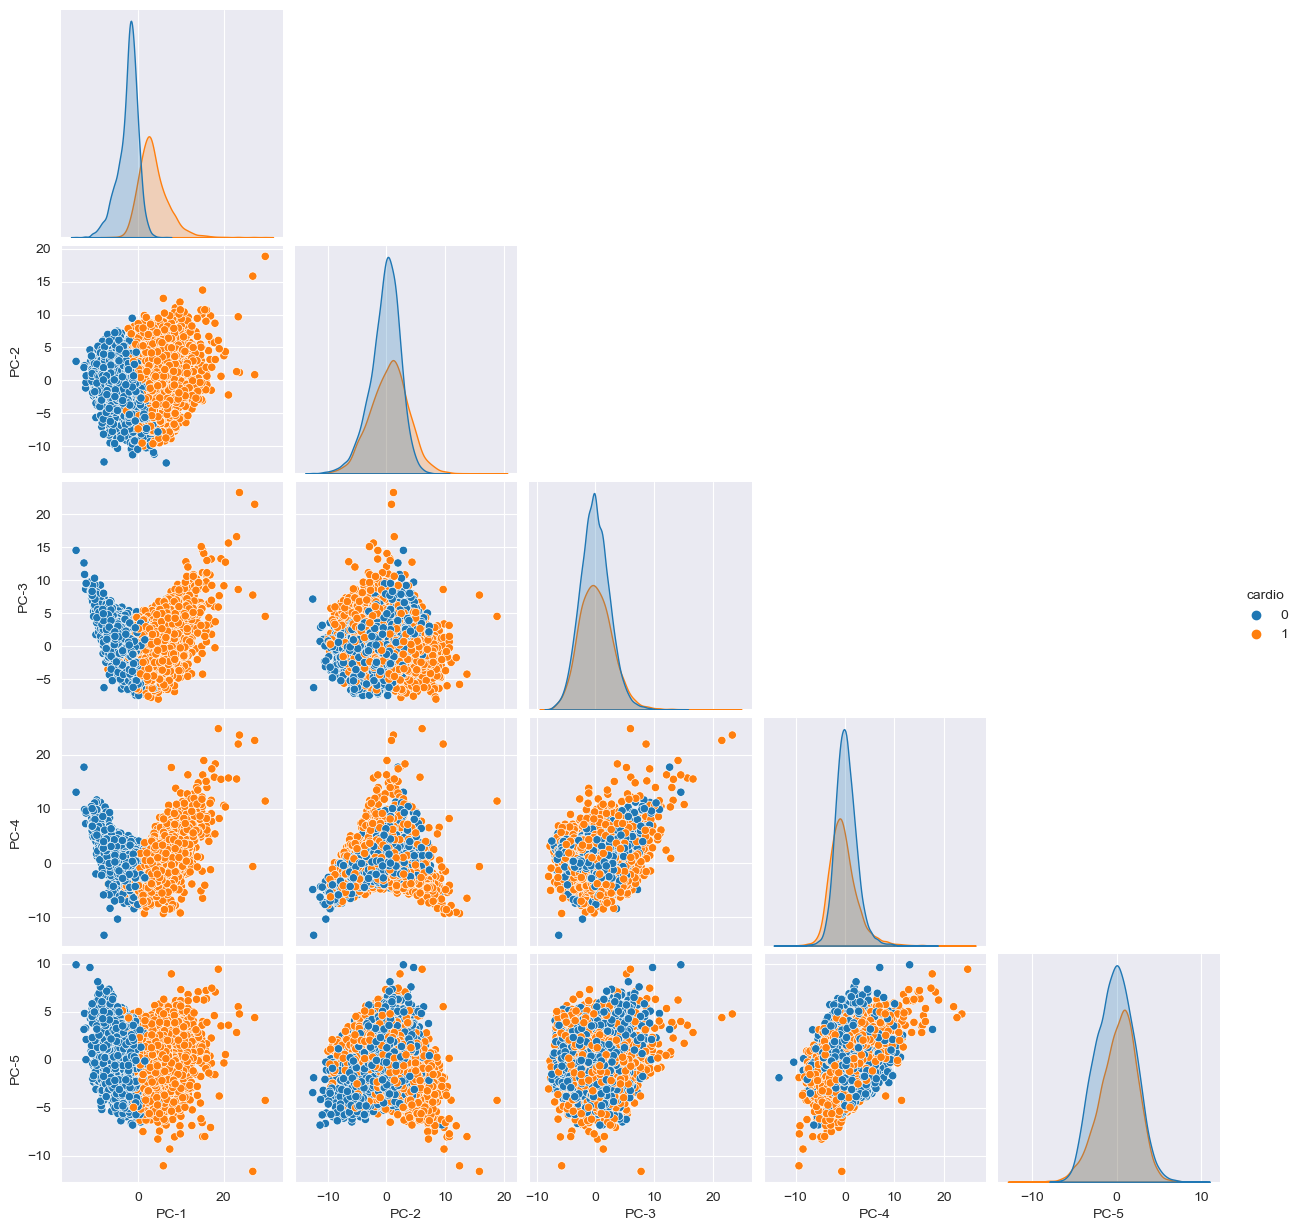

In [56]:
# viewing the pairplot for the first five principal components which carry most of the variance
df_test = pd.DataFrame(Z_test.iloc[:,0:5])
yh_test = pd.DataFrame(yh_test,columns=['cardio'])
yh_test.reset_index(drop=True,inplace=True)
df_test['cardio'] = yh_test
g = sns.pairplot(df_test, corner='True',hue='cardio')

In [28]:
#comparing incorrect predictions by their PC-1 value
#PC-1 separates the data better than all other PCs (see below)
incorrect_pred = pd.DataFrame(Z_test.iloc[:,0])
yh_test = pd.DataFrame(yh_test ,columns=['predicted'])
y_test.reset_index(drop=True, inplace=True)
incorrect_pred['true'] = y_test
incorrect_pred['predicted'] = yh_test
incorrect_pred

,PC-1,true,predicted
0,7.210107,1,1
1,2.512148,1,1
2,-7.015776,0,0
3,0.483924,1,0
4,-1.847379,1,0
...,...,...,...
13293,-2.905924,1,0
13294,3.097165,1,1
13295,1.136131,0,1
13296,5.566961,1,1


In [29]:
#finding and describing incorrect predictions based on their PC-1
incorrect_pred = incorrect_pred.query('true != predicted')
incorrect_pred['PC-1'].describe()

count    3652.000000
mean       -0.236691
std         3.283737
min       -12.318526
25%        -2.071608
50%        -0.632581
75%         1.394301
max        18.980722
Name: PC-1, dtype: float64

In [30]:
#comparing all test points by their PC-1
Z_test['PC-1'].describe()

count    13298.000000
mean         0.023333
std          4.072219
min        -14.560478
25%         -2.391881
50%         -0.579823
75%          2.358491
max         29.755622
Name: PC-1, dtype: float64

## Analyzing False Negatives Through Confusion Matrices

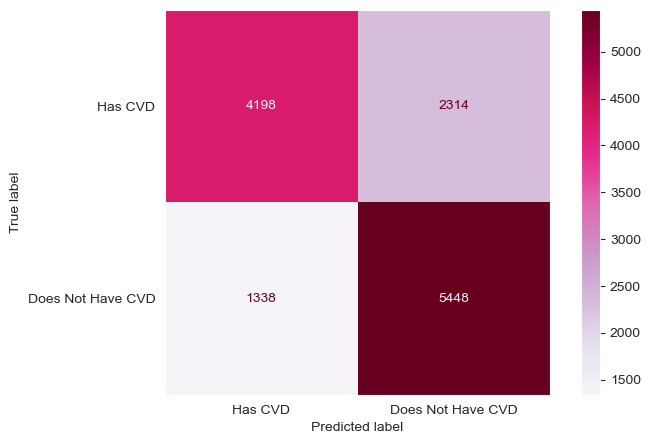

In [46]:
#viewing a confusion matrix for the testing data
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# def provided by https://towardsdatascience.com/comprehensive-tutorial-on-using-confusion-matrix-in-classification-92be4d70ea18
def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax, cmap='PuRd')
    plt.grid(False)
# Generate the testing confusing matrix
custom_confusion_matrix(
    y_test, yh_test,
    display_labels=["Has CVD", "Does Not Have CVD"]
)

In [58]:
false_neg_test = 2314/(2314+1338)

In [32]:
#pulling predicted values for the training data
yh_train = knnCV.predict(Z)

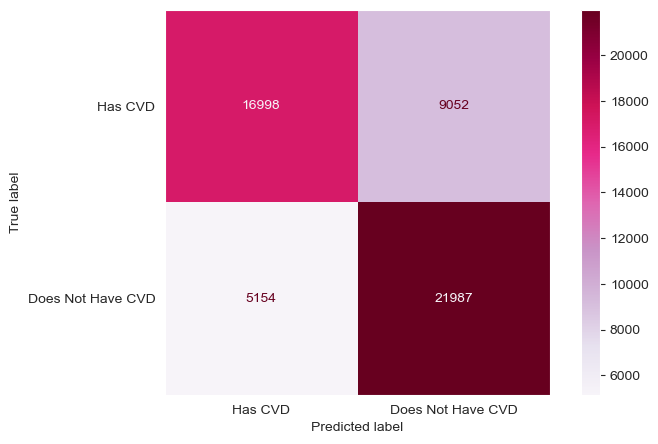

In [47]:
#viewing a confusion matrix for the training data
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# def provided by https://towardsdatascience.com/comprehensive-tutorial-on-using-confusion-matrix-in-classification-92be4d70ea18
def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax, cmap='PuRd')
    plt.grid(False)
# Generate the testing confusing matrix
custom_confusion_matrix(
    y_train, yh_train,
    display_labels=["Has CVD", "Does Not Have CVD"]
)

In [57]:
false_neg_train = 9052/(9052+5154)

In [60]:
print('Training False Negative Rate:', false_neg_train.__round__(3))
print('Testing False Negative Rate:', false_neg_test.__round__(3))

Training False Negative Rate: 0.637
Testing False Negative Rate: 0.634
